In [1]:
import pandas as pd 
import numpy as np 
import sys
import os

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

from Load_data import CSVDataloader, get_file_path
from EDA import univariate_analysis, bivariate_analysis, merge_datasets, engineer_features


In [2]:
# Load credit data
credit_path = get_file_path("credit")
credit_loader = CSVDataloader(credit_path)
df_credit = credit_loader.load_data()

# Load fraud data
fraud_path = get_file_path("fraud")
fraud_loader = CSVDataloader(fraud_path)
df_fraud = fraud_loader.load_data()

# Load IPAddress data
IPAddress_path = get_file_path("IpAddresss")
IPAddress_loader = CSVDataloader(IPAddress_path)
df_Address = IPAddress_loader.load_data()


In [3]:
# Load credit dataset
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Load credit dataset
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2/24/2015 22:55,4/18/2015 2:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,6/7/2015 20:39,6/8/2015 1:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,1/1/2015 18:52,1/1/2015 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,4/28/2015 21:13,5/4/2015 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,7/21/2015 7:09,9/9/2015 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
df_Address.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


## Data Analysis and Preprocessing

In [7]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
df_fraud.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [27]:
print("\nMissing values in fraud dataset:")
df_fraud.isna().sum()


Missing values in fraud dataset:


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [26]:
# Check for missing values in IP address dataset
print("\nMissing values in IP address dataset:")
print(df_Address.isnull().sum())



Missing values in IP address dataset:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [28]:
# Check for duplicates in fraud dataset
print("\nDuplicate rows in fraud dataset before cleaning:", df_fraud.duplicated().sum())


Duplicate rows in fraud dataset before cleaning: 0


In [29]:
# Check for duplicates in IP address dataset
print("\nDuplicate rows in IP address dataset before cleaning:", df_Address.duplicated().sum())


Duplicate rows in IP address dataset before cleaning: 0


#### Correct Data Types
df_fraud['ip_address'] is currently a float64. Since IP addresses are stored as numeric IDs (likely converted from dotted format), I will convert it to integers.

In [5]:
# Check current data types
print("\nFraud dataset data types before correction:")
print(df_fraud.dtypes)


Fraud dataset data types before correction:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


In [4]:
# Convert ip_address from float to int
df_fraud['ip_address'] = df_fraud['ip_address'].astype('int64')

In [5]:
# Convert datetime columns in fraud dataset
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])

In [7]:
# Convert class to boolean (since it's binary)
df_fraud['class'] = df_fraud['class'].astype(bool)

In [16]:
# Verify data types after conversion
print("\nFraud dataset data types after correction:")
print(df_fraud.dtypes)


Fraud dataset data types after correction:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
dtype: object


In [6]:
print("\nIP address dataset data types before correction:")
print(df_Address.dtypes)


IP address dataset data types before correction:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object


In [7]:
# For IP address dataset, ensure numeric columns are correct
df_Address['lower_bound_ip_address'] = df_Address['lower_bound_ip_address'].astype('int64')
df_Address['upper_bound_ip_address'] = df_Address['upper_bound_ip_address'].astype('int64')
df_Address['country'] = df_Address['country'].astype('category')

In [8]:
print("\nIP address dataset data types after correction:")
print(df_Address.dtypes)


IP address dataset data types after correction:
lower_bound_ip_address       int64
upper_bound_ip_address       int64
country                   category
dtype: object


## Univariate analysis

Starting Univariate Analysis...


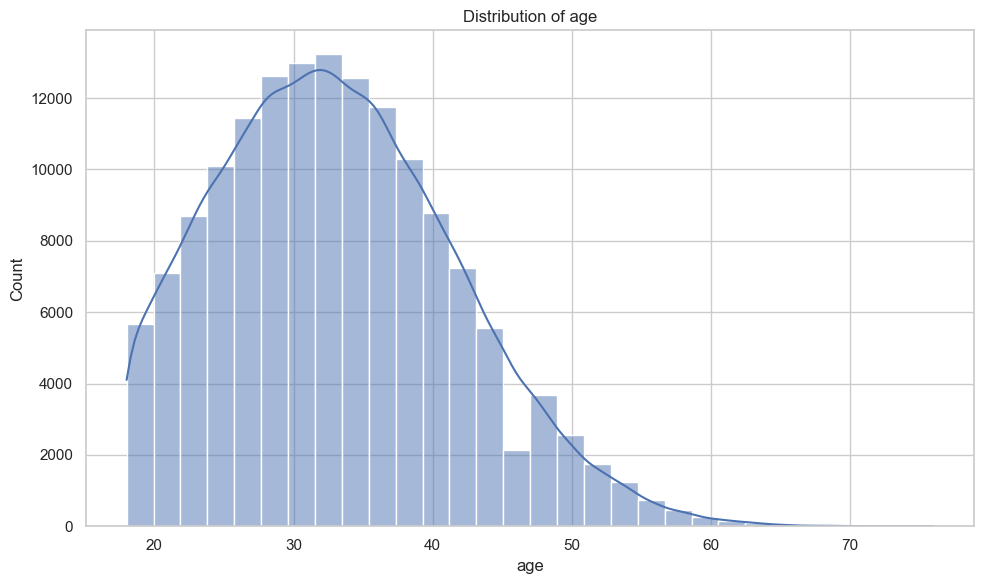

In [ ]:
print("Starting Univariate Analysis...")
univariate_analysis(df_fraud, "age")

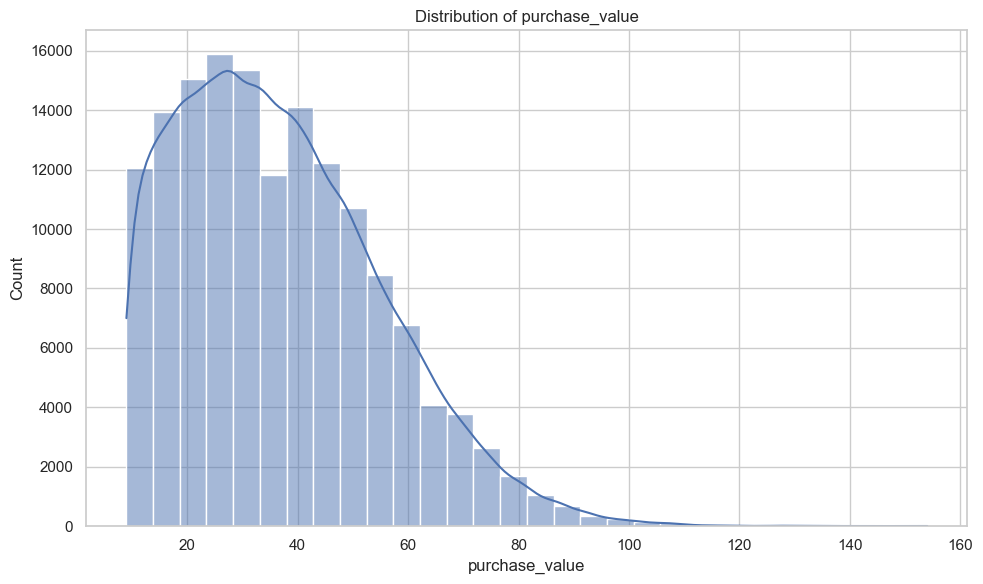

In [13]:
univariate_analysis(df_fraud, "purchase_value")

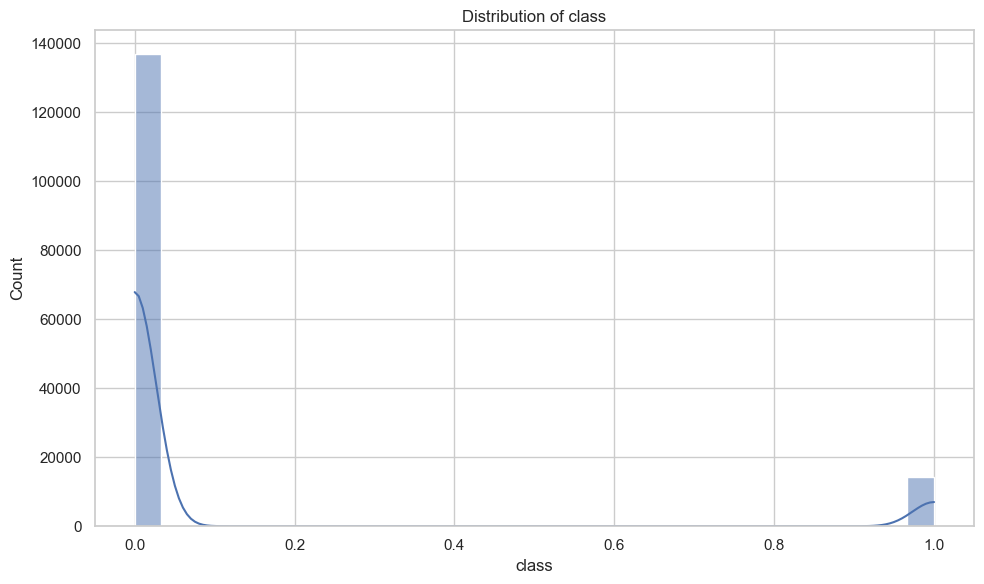

In [18]:
univariate_analysis(df_fraud, "class")

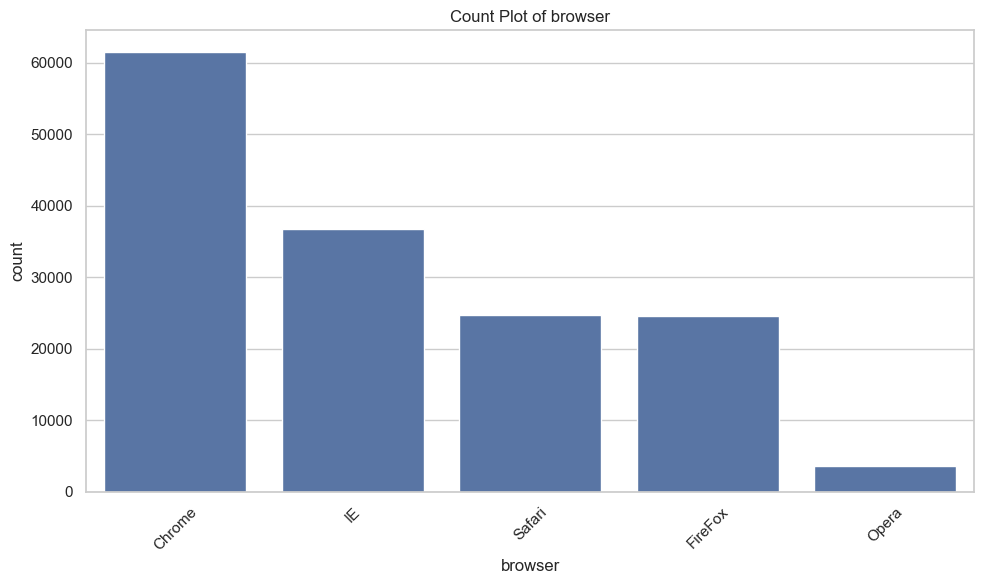

In [15]:
univariate_analysis(df_fraud, "browser")

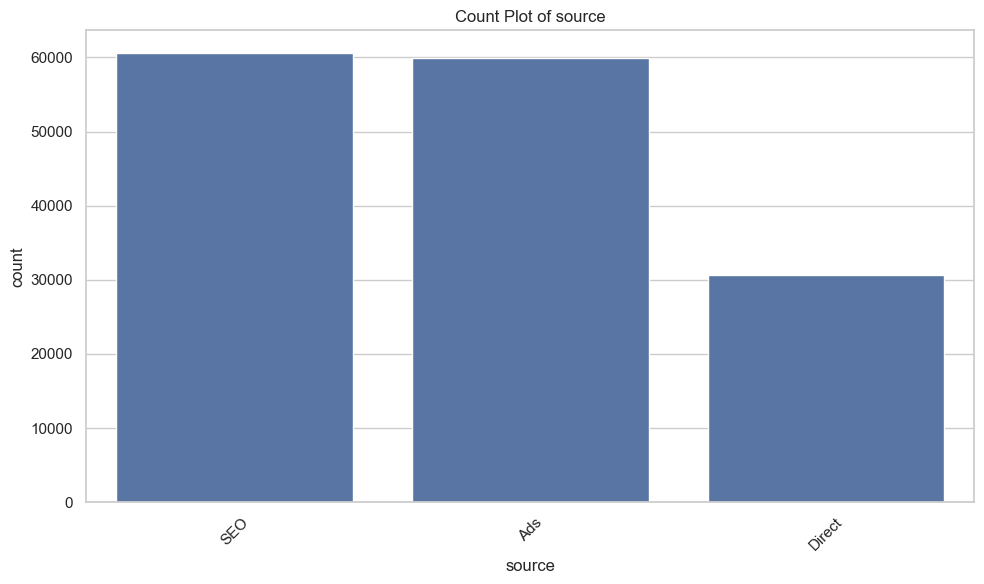

In [16]:
univariate_analysis(df_fraud, "source")

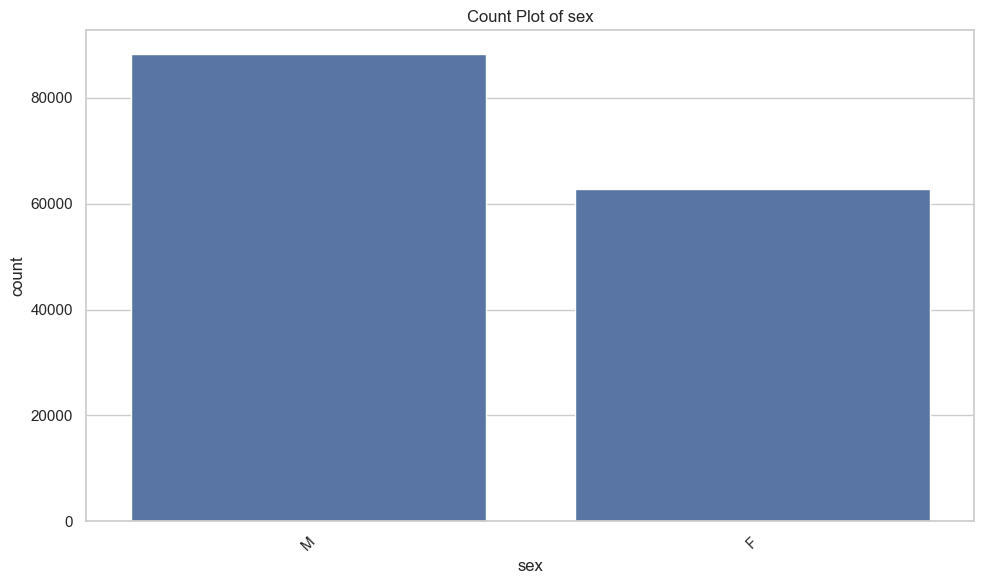

In [17]:
univariate_analysis(df_fraud, "sex")

## Bivariate analysis

Starting Bivariate Analysis...


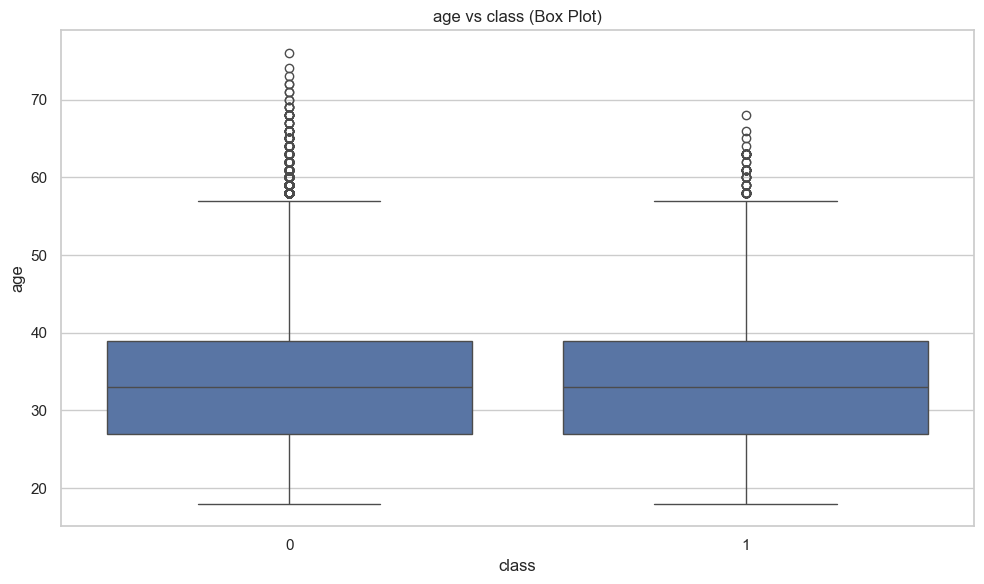

In [19]:
print("Starting Bivariate Analysis...")
bivariate_analysis(df_fraud, "age", "class")

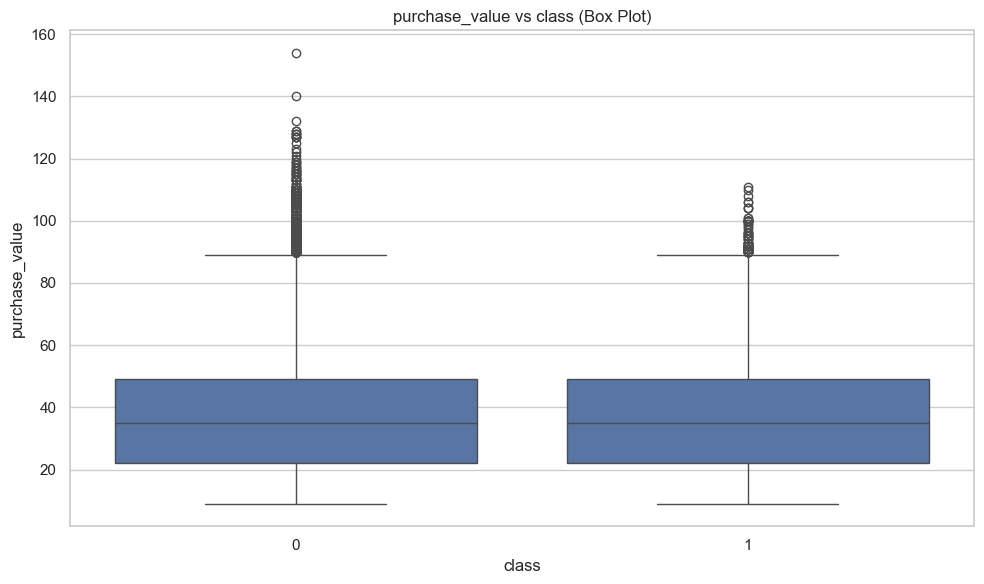

In [21]:
bivariate_analysis(df_fraud, "purchase_value", "class")

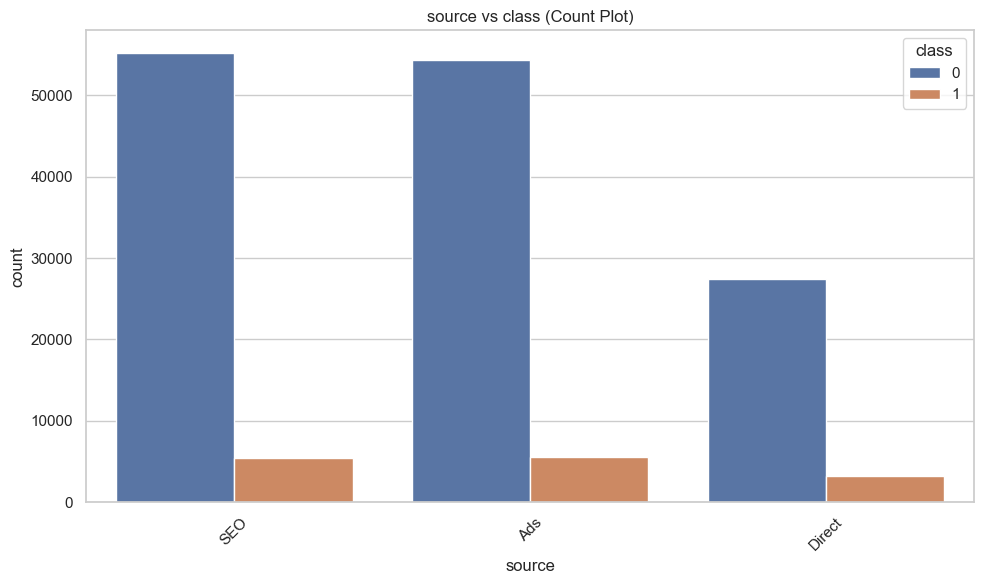

In [22]:
bivariate_analysis(df_fraud, "source", "class")

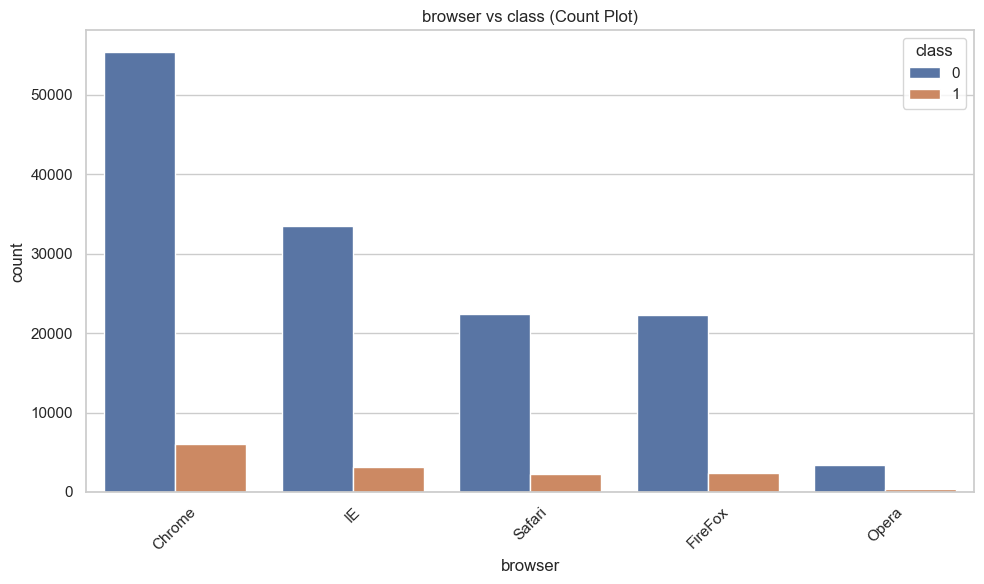

In [23]:
bivariate_analysis(df_fraud, "browser", "class")

### Merge Datasets for Geolocation Analysis

In [9]:
merged_df = merge_datasets(df_fraud, df_Address)


In [10]:
print(merged_df.head())

   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:00 2015-04-18 02:47:00              34   
1   333320 2015-06-07 20:39:00 2015-06-08 01:38:00              16   
2     1359 2015-01-01 18:52:00 2015-01-01 18:52:00              15   
3   150084 2015-04-28 21:13:00 2015-05-04 13:54:00              44   
4   221365 2015-07-21 07:09:00 2015-09-09 18:40:00              39   

       device_id source browser sex  age  ip_address  class    ip_numeric  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0  7.327584e+08   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387      0  3.503114e+08   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820      1  2.621474e+09   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542444      0  3.840542e+09   
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117      0  4.155831e+08   

         country  
0          Japan  
1  United States  
2  United States  
3            NaN  
4  United States  


### Feature Engineering

In [ ]:
# Convert datetime columns if needed
# fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
# fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])



In [11]:
# Apply feature engineering
engineered_df = engineer_features(merged_df)


Engineering transaction frequency and velocity features...
Engineering time-based features...
Calculating time since signup...
Creating additional features...


In [12]:
# Display the new features
print(engineered_df[['user_id', 'purchase_time', 'time_since_last_txn', 
                    'txn_count', 'hour_of_day', 'day_of_week', 
                    'time_since_signup']].head())

        user_id       purchase_time  time_since_last_txn  txn_count  \
116708        2 2015-02-21 10:03:00                  NaN          1   
15108         4 2015-09-26 21:32:00                  NaN          1   
46047         8 2015-08-13 11:53:00                  NaN          1   
67650         9 2015-05-20 23:06:00                  NaN          1   
109067       12 2015-03-04 20:56:00                  NaN          1   

        hour_of_day  day_of_week  time_since_signup  
116708           10            5         990.266667  
15108            21            5        2788.866667  
46047            11            3        1852.000000  
67650            23            2         103.133333  
109067           20            2        1286.516667  


In [13]:
# After running engineer_features(), you can analyze the new features:

# 1. Analyze transaction velocity
velocity_stats = engineered_df.groupby('class')['time_since_last_txn'].describe()
print("\nTransaction velocity statistics by fraud class:")
print(velocity_stats)


Transaction velocity statistics by fraud class:
       count  mean  std  min  25%  50%  75%  max
class                                           
0        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
1        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN


In [14]:
import matplotlib.pyplot as plt

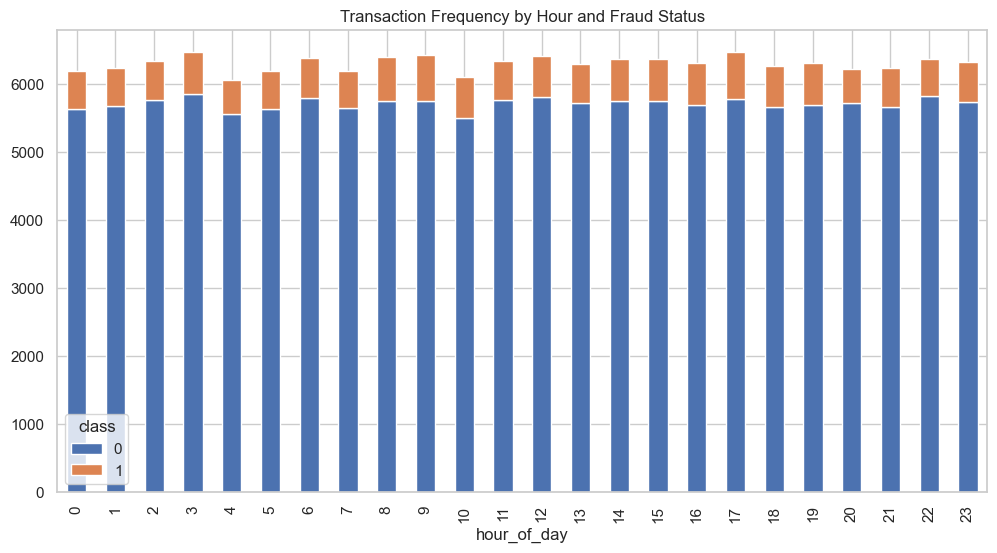

In [15]:
# 2. Analyze time patterns
time_patterns = engineered_df.groupby(['hour_of_day', 'class']).size().unstack()
time_patterns.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Transaction Frequency by Hour and Fraud Status')
plt.show()


In [16]:
# 3. Analyze time since signup
signup_analysis = engineered_df.groupby('class')['time_since_signup'].describe()
print("\nTime since signup statistics by fraud class:")
print(signup_analysis)


Time since signup statistics by fraud class:
          count         mean         std       min         25%          50%  \
class                                                                         
0      136961.0  1441.994037  830.163548  0.033333  719.116667  1443.033333   
1       14151.0   673.289531  920.496863  0.000000    0.000000     0.000000   

               75%          max  
class                            
0      2161.466667  2879.983333  
1      1330.700000  2878.883333  
